In [1]:
import pandas as pd
import torch
import os
import yaml
import matplotlib.pyplot as plt
from ultralytics import YOLO
from pathlib import Path
import pathlib
from IPython.display import display, Image
import cv2

In [2]:
# change the working directory
# run this every time on start up
# ensures that its referencing the scratch directory which has 3 TB of space
%cd /scratch/xw10/jj8584

/scratch/xw10/jj8584


/scratch/sa4/test/miniconda3/envs/TEST4/lib/python3.11/site-packages/IPython/core/magics/osm.py:417: UserWarning: using dhist requires you to install the `pickleshare` library.
  self.shell.db['dhist'] = compress_dhist(dhist)[-100:]


In [3]:
V9 = YOLO('yolov9c.pt')

100%|██████████| 49.4M/49.4M [00:41<00:00, 1.25MB/s]


In [10]:
params = {
    'data':'DATA/data.yaml', # path to the data file as specified in the data.yaml file,
    'model': 'yolov8x.pt', # make explicit the path of where the model sits
    'imgsz':416, # size images per as integer w,h
    'epochs':25,
    'optimizer':'Adam',
    'pretrained':True, # whether or not to use pretrained model
    'lr0':0.1,     # starting lr
    'lrf': 0.00001,# final lr
    'cos_lr': True # use the cosine learning rate scheduler,
    ,'val': True # specifically train the model
    ,'hsv_h': 0.02,
     'hsv_s': 0.5,
     'hsv_v': 0.3,
     'degrees': 5.0,
     'translate': 0.05,
     'scale': 0.3,
     'shear': 0.0,
     'perspective': 0.0,
     'flipud': 0.0,
     'fliplr': 0.3,
     'mosaic': 0.5,
     'mixup': 0.0,
     'label_smoothing': 0.15,
     'box': 10.0,
     'cls': 2.0,
     'dfl': 2.0
}

In [11]:
params

{'data': 'DATA/data.yaml',
 'model': 'yolov8x.pt',
 'imgsz': 416,
 'epochs': 25,
 'optimizer': 'Adam',
 'pretrained': True,
 'lr0': 0.1,
 'lrf': 1e-05,
 'cos_lr': True,
 'val': True,
 'hsv_h': 0.02,
 'hsv_s': 0.5,
 'hsv_v': 0.3,
 'degrees': 5.0,
 'translate': 0.05,
 'scale': 0.3,
 'shear': 0.0,
 'perspective': 0.0,
 'flipud': 0.0,
 'fliplr': 0.3,
 'mosaic': 0.5,
 'mixup': 0.0,
 'label_smoothing': 0.15,
 'box': 10.0,
 'cls': 2.0,
 'dfl': 2.0}

# Model V9 Training

We train th Yolov9 model based on the full parameter list and observe its results on the Blood Cell dataset.

In [7]:
train_results = V9.train(**params)

New https://pypi.org/project/ultralytics/8.2.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=False, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fra

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
/home/576/jj8584/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.01G      3.819      44.41      3.645        202        416: 100%|██████████| 48/48 [00:13<00:00,  3.64it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.15G      3.747       11.2      3.353        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.15G       3.74      11.01       3.31        206        416: 100%|██████████| 48/48 [00:07<00:00,  6.48it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.15G      3.673      11.04      3.394        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.16G       3.69      10.76      3.359        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.15G      3.675      10.73      3.276        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.14G      3.535      10.07      3.337        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.15G      3.314      9.373      2.898        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.15G      3.183      8.666      2.726        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.16G      3.022      8.272      2.682        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.15G      2.879      7.873      2.684        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      2.681      6.978      2.498        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.16G      2.561      6.477      2.387        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.54it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      2.494      6.137      2.284        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.51it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G      2.402      5.858      2.264        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      2.209      5.374       2.14        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.10it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.15G      2.141      5.448      2.176        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.15G      2.143      5.125      2.097        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.15G      2.079      4.926      2.035        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.14G      1.998      4.624      1.982        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.994      4.585      1.984        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.15G      1.938      4.398      1.951        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.15G       1.91      4.304      1.928        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.53it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.15G      1.875      4.231      1.898        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.43it/s]



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.15G      1.864      4.223      1.901        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.31it/s]


                   all         73        967      0.808      0.868      0.878      0.501

25 epochs completed in 0.060 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 51.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.81it/s]


                   all         73        967      0.808      0.868      0.878      0.501
             Platelets         73         76      0.784      0.829      0.847      0.361
                   RBC         73        819      0.695      0.775      0.812      0.487
                   WBC         73         72      0.944          1      0.976      0.656
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 0.9ms postprocess per image
Results saved to runs/detect/train3


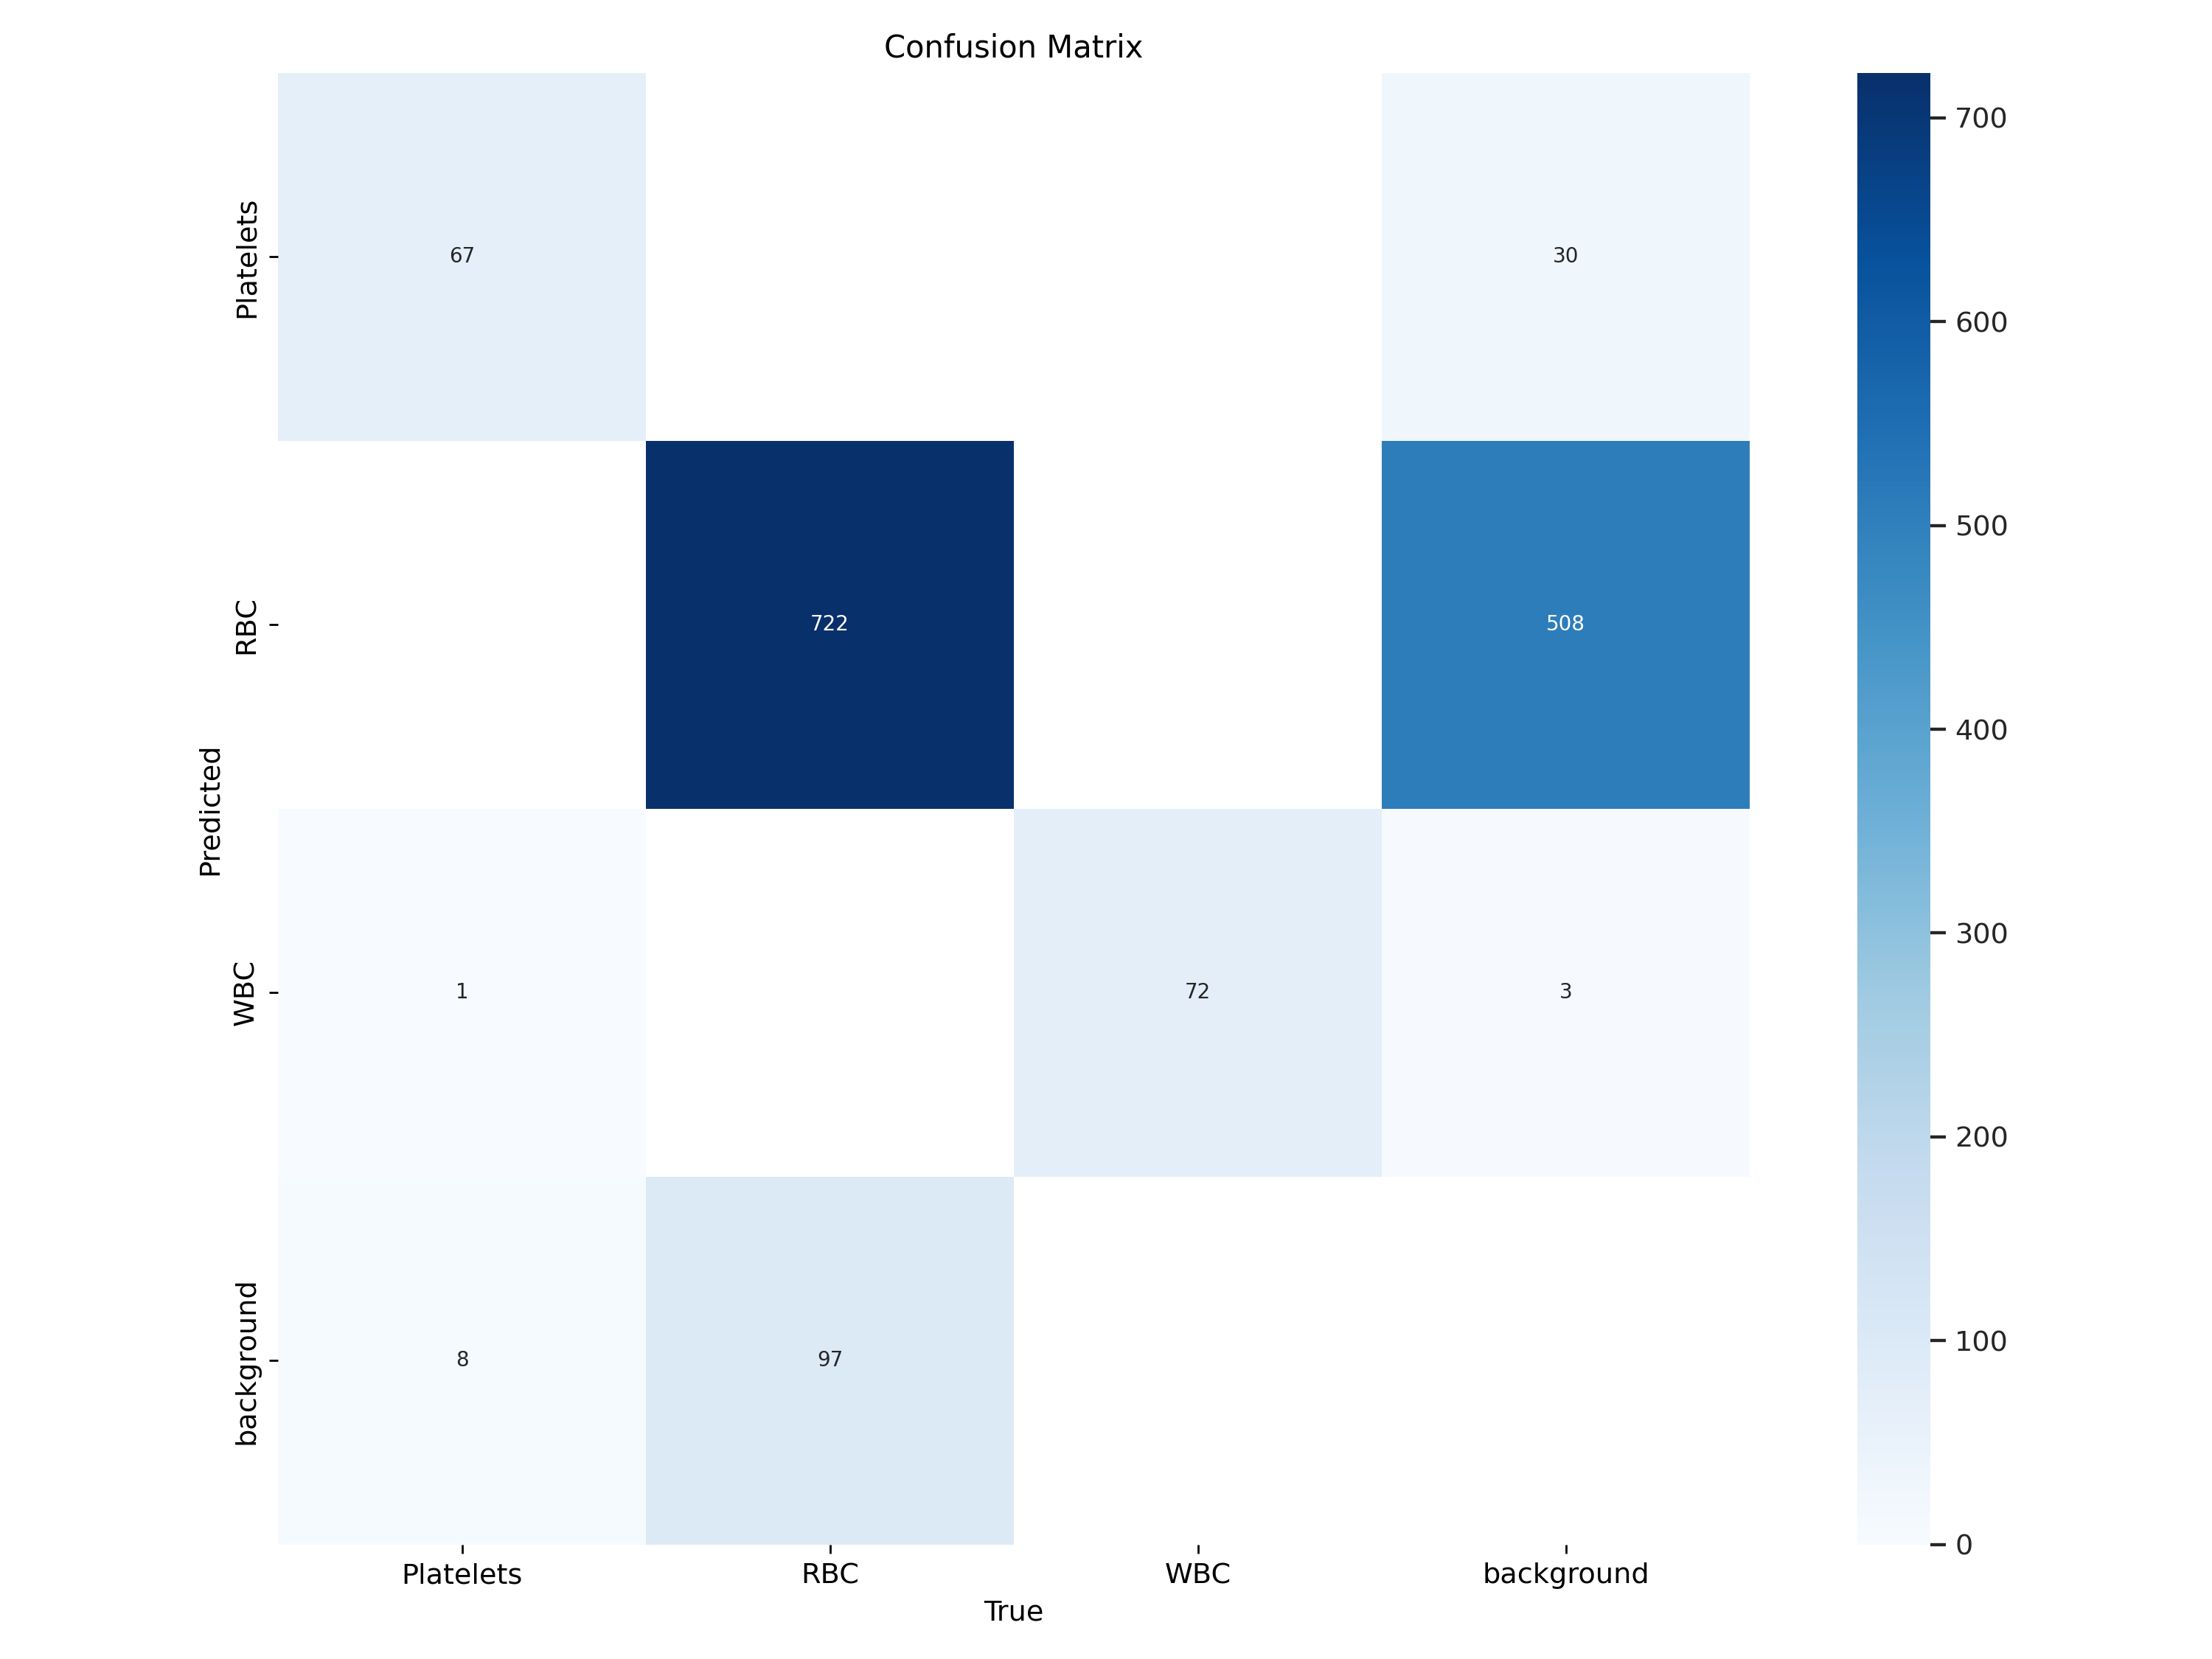

In [8]:
Image(filename =f'runs/detect/trainV9_280425/confusion_matrix.png')

In [12]:
train_results2 = V9.train(**params)

New https://pypi.org/project/ultralytics/8.2.4 available 😃 Update with 'pip install -U ultralytics'
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
engine/trainer: task=detect, mode=train, model=yolov8x.pt, data=DATA/data.yaml, epochs=25, time=None, patience=100, batch=16, imgsz=416, save=True, save_period=-1, cache=False, device=None, workers=8, project=None, name=train3, exist_ok=False, pretrained=True, optimizer=Adam, verbose=True, seed=0, deterministic=True, single_cls=False, rect=False, cos_lr=True, close_mosaic=10, resume=False, amp=True, fraction=1.0, profile=False, freeze=None, multi_scale=False, overlap_mask=True, mask_ratio=4, dropout=0.0, val=True, split=val, save_json=False, save_hybrid=False, conf=None, iou=0.7, max_det=300, half=False, dnn=False, plots=True, source=None, vid_stride=1, stream_buffer=False, visualize=False, augment=False, agnostic_nms=False, classes=None, retina_masks=False, embed=None, show=False, save_fram

train: Scanning /scratch/xw10/jj8584/DATA/train/labels.cache... 765 images, 0 backgrounds, 0 corrupt: 100%|██████████| 765/765 [00:00<?, ?it/s]
val: Scanning /scratch/xw10/jj8584/DATA/valid/labels.cache... 73 images, 0 backgrounds, 0 corrupt: 100%|██████████| 73/73 [00:00<?, ?it/s]
/home/576/jj8584/.local/lib/python3.11/site-packages/torch/utils/data/dataloader.py:558: UserWarning: This DataLoader will create 16 worker processes in total. Our suggested max number of worker in current system is 12, which is smaller than what this DataLoader is going to create. Please be aware that excessive worker creation might get DataLoader running slow or even freeze, lower the worker number to avoid potential slowness/freeze if necessary.
  warnings.warn(_create_warning_msg(


Plotting labels to runs/detect/train3/labels.jpg... 
optimizer: Adam(lr=0.1, momentum=0.937) with parameter groups 154 weight(decay=0.0), 161 weight(decay=0.0005), 160 bias(decay=0.0)
Image sizes 416 train, 416 val
Using 8 dataloader workers
Logging results to runs/detect/train3
Starting training for 25 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       1/25      5.02G      2.185      5.045      2.111        202        416: 100%|██████████| 48/48 [00:08<00:00,  5.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]

                   all         73        967      0.832      0.464      0.696      0.339



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       2/25      5.17G      2.188       5.12      2.103        258        416: 100%|██████████| 48/48 [00:07<00:00,  6.16it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.38it/s]

                   all         73        967      0.379      0.338      0.314      0.128



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       3/25      5.17G      2.122      4.931      2.051        206        416: 100%|██████████| 48/48 [00:07<00:00,  6.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.85it/s]


                   all         73        967      0.923       0.27       0.27      0.107

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       4/25      5.14G      2.123      4.939      2.081        217        416: 100%|██████████| 48/48 [00:07<00:00,  6.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.55it/s]

                   all         73        967      0.837      0.436      0.538       0.28



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       5/25      5.17G      2.134      4.943      2.083        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  7.84it/s]

                   all         73        967       0.83      0.281      0.364      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       6/25      5.17G      2.089      4.919      2.096        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.40it/s]

                   all         73        967      0.701      0.708      0.782      0.373



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       7/25      5.17G      2.091      4.773      2.075        215        416: 100%|██████████| 48/48 [00:07<00:00,  6.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]

                   all         73        967      0.777       0.79      0.833      0.474



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       8/25      5.17G      2.078      4.779      2.059        242        416: 100%|██████████| 48/48 [00:07<00:00,  6.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.63it/s]

                   all         73        967      0.392      0.484      0.249      0.125



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


       9/25      5.16G      2.055      4.658      2.056        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.41it/s]

                   all         73        967      0.438      0.613      0.512      0.233



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      10/25      5.17G      2.016      4.571      2.007        237        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.39it/s]

                   all         73        967      0.716      0.798      0.834      0.472



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      11/25      5.17G      1.988      4.444      2.016        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.24it/s]

                   all         73        967      0.591      0.525      0.539      0.193



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      12/25      5.15G      1.994      4.434      2.009        233        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.37it/s]

                   all         73        967      0.637      0.708      0.731      0.381



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      13/25      5.17G      2.014      4.555      2.043        207        416: 100%|██████████| 48/48 [00:07<00:00,  6.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.35it/s]

                   all         73        967      0.516      0.845      0.854      0.397



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      14/25      5.15G      1.934       4.35      1.982        199        416: 100%|██████████| 48/48 [00:07<00:00,  6.26it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.31it/s]

                   all         73        967      0.588      0.813      0.789       0.43



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      15/25      5.15G       1.95      4.362       1.99        246        416: 100%|██████████| 48/48 [00:07<00:00,  6.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.45it/s]

                   all         73        967      0.765      0.859      0.858      0.532


Closing dataloader mosaic

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      16/25      5.16G      1.811       4.06      1.896        157        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]

                   all         73        967       0.75      0.867      0.872      0.538



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      17/25      5.18G      1.797      3.968       1.89        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.48it/s]

                   all         73        967      0.709      0.917      0.892      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      18/25      5.17G      1.786      3.911      1.886        172        416: 100%|██████████| 48/48 [00:07<00:00,  6.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.58it/s]

                   all         73        967      0.659      0.894      0.841      0.483



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      19/25      5.17G       1.74      3.826      1.853        170        416: 100%|██████████| 48/48 [00:07<00:00,  6.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.20it/s]

                   all         73        967      0.788        0.9      0.875      0.561



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      20/25      5.15G      1.706      3.731      1.829        168        416: 100%|██████████| 48/48 [00:07<00:00,  6.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.44it/s]

                   all         73        967      0.753      0.927       0.87      0.522



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      21/25      5.15G      1.707      3.738      1.832        161        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]

                   all         73        967      0.754      0.938      0.866      0.541



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      22/25      5.16G      1.686       3.65      1.812        180        416: 100%|██████████| 48/48 [00:07<00:00,  6.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.57it/s]

                   all         73        967      0.803      0.933      0.889      0.552



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      23/25      5.17G      1.683       3.62      1.804        171        416: 100%|██████████| 48/48 [00:07<00:00,  6.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]

                   all         73        967      0.815      0.925      0.883      0.576



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      24/25      5.17G      1.659       3.59      1.788        194        416: 100%|██████████| 48/48 [00:07<00:00,  6.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.59it/s]

                   all         73        967      0.803      0.935      0.887      0.574



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      25/25      5.16G      1.662      3.606      1.799        214        416: 100%|██████████| 48/48 [00:07<00:00,  6.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  8.62it/s]

                   all         73        967      0.803       0.93      0.888      0.572



25 epochs completed in 0.061 hours.
Optimizer stripped from runs/detect/train3/weights/last.pt, 51.6MB
Optimizer stripped from runs/detect/train3/weights/best.pt, 51.6MB

Validating runs/detect/train3/weights/best.pt...
Ultralytics YOLOv8.1.47 🚀 Python-3.11.8 torch-2.2.2+cu121 CUDA:0 (Tesla V100-SXM2-32GB, 32501MiB)
YOLOv9c summary (fused): 384 layers, 25321561 parameters, 0 gradients, 102.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.42it/s]


                   all         73        967      0.816      0.925      0.883      0.576
             Platelets         73         76      0.777      0.908      0.819      0.445
                   RBC         73        819      0.714      0.867      0.859      0.556
                   WBC         73         72      0.957          1      0.971      0.729
Speed: 0.2ms preprocess, 2.4ms inference, 0.0ms loss, 0.6ms postprocess per image
Results saved to runs/detect/train3


In [ ]:
trainV9_280424_validation

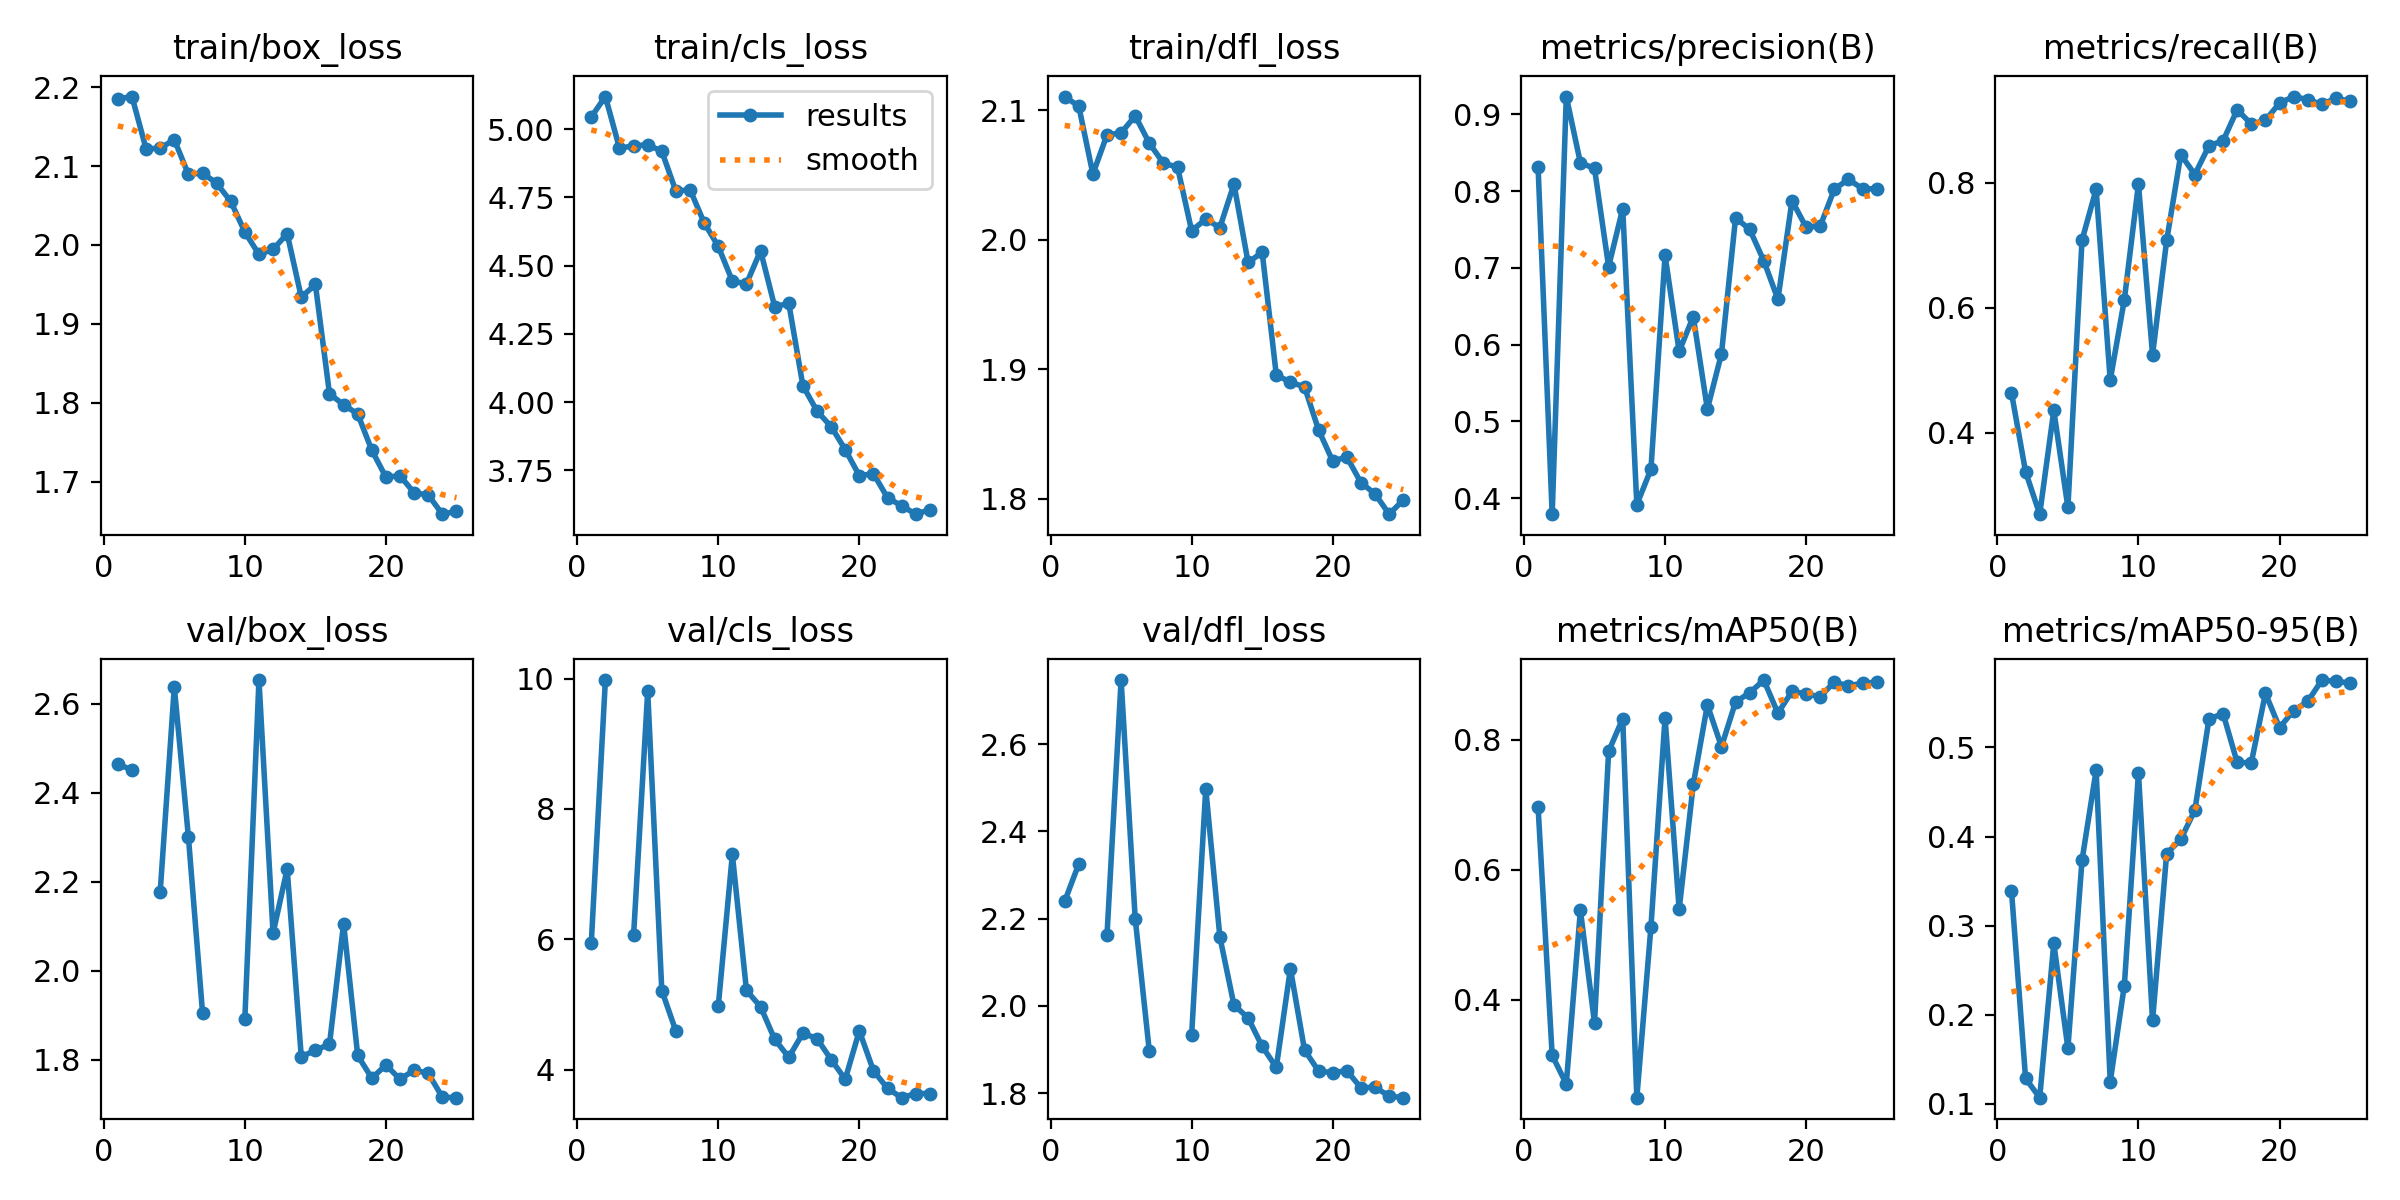

In [17]:
# with validation at each step
Image(filename =f'runs/detect/trainV9_280424_validation/results.png')

In [15]:
Image(filename=f'runs/detect/trainV9_280424_validation/confusion_matrix.png')

438

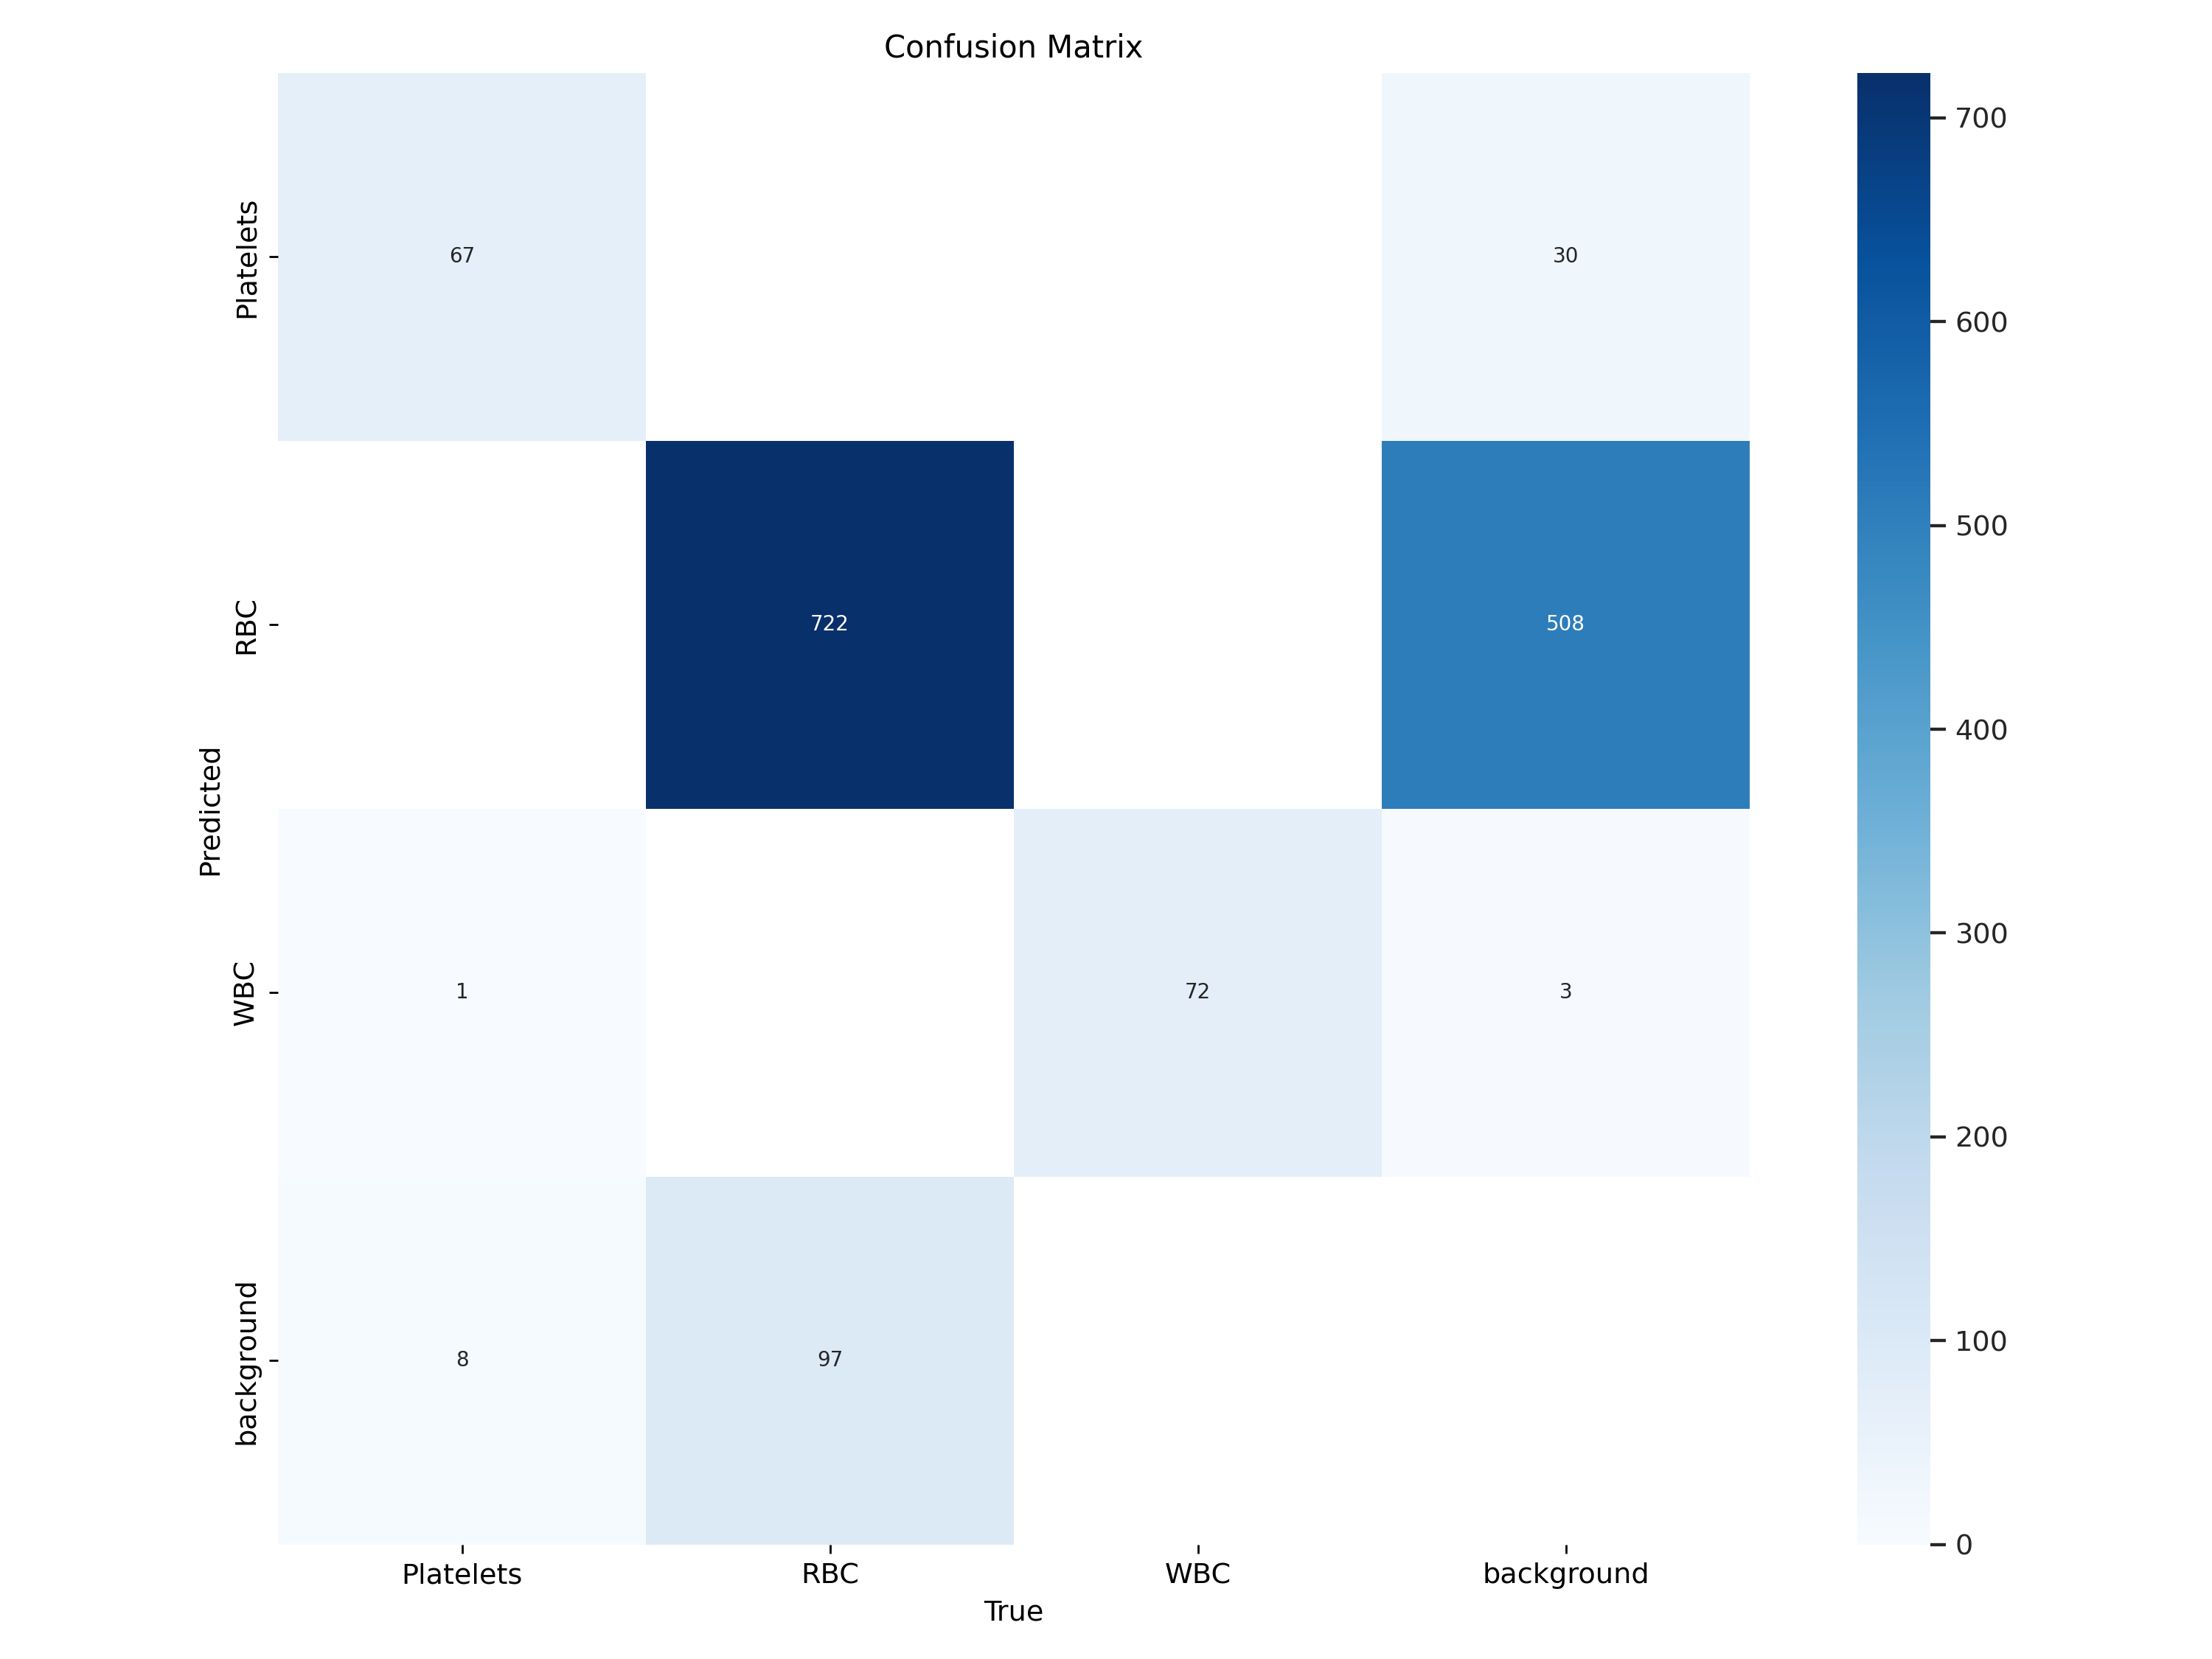

In [14]:
# without validation at each step
Image(filename =f'runs/detect/trainV9_280424/confusion_matrix.png')

In [16]:
97 +508 # detects 605 RBCs in the background vs 722 in ground truth/ labeled ones

605